# Investigate behaviour of 2D system

In [12]:
# import necessary packages
import numpy as np
import matplotlib.pyplot as plt
from types import SimpleNamespace
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
from tqdm import tqdm
import pickle
import visualisation as vis
from delta_hes_model import *

## 2D system variance for different values of coupling strength + Hill coefficient

### Functions

In [ ]:
def test_Delta_coup(coefficient, coup_strength, lattice, params, num_tsteps, dt):
    print('Coefficient:', coefficient)
    print('Coupling strength:', coup_strength)

    params.n = coefficient
    params.w_coupling = coup_strength

    h, m_h, d, m_d = simulate(num_tsteps, dt, lattice, params, coupling_type= 'Delta', initial_type='checkerboard')

    return h, m_h, d, m_d

def test_results(results):
    std = np.std(results, axis=1)
    mean = np.mean(results, axis=1)
    
    return std, mean

### Parameters

In [18]:
#set the lattice of the cells 
P = 20
Q = 6

lattice = get_lattice(P, Q)

# # set initial parameters of the reactions 
gamma_h = 0.03
gamma_d = 0.03
gamma_m = 0.03
p_h = 100
p_d = 100
T_h = 20
T_coupling = 0
w_h = 1
w_coupling = 0.01
l = 5
n = 3

params = get_params(gamma_h, gamma_d, gamma_m, p_h, p_d, T_h, T_coupling, w_h, w_coupling, l, n, lattice, grad_hes = True, grad_coup = False, grad_hes_strength = 0.2, grad_coup_strength = 0)

### Varying coupling strength and Hill coefficient

In [16]:
# # code for testing multiple coupling strengths and Hill coefficients
# num_tsteps = 10000
# dt = 0.2

coefficients = [1, 2, 3, 4, 5]
coupling_strengths = [0, 0.05, 0.1, 0.2, 0.4]
# results = np.zeros([5, 5, num_tsteps, lattice.P, lattice.Q])

# for i in range(len(coefficients)):
#     for j in range(len(coupling_strengths)):
#         coeff = coefficients[i]
#         coup_strength = coupling_strengths[j]
#         h, m_h, d, m_d = test_Delta_coup(coeff, coup_strength, lattice, num_tsteps, dt)

#         results[i, j,:,:,:] = h


# data = results

# with open("results_delta_std_15_04.pkl", "wb") as file:
#     pickle.dump(data, file)



### Open results from file

In [13]:
with open(r'C:\Users\kbmcd\OneDrive\Documenten\Studie\Master_Thesis\Result_files\results_delta_std_15_04.pkl', 'rb') as f:
    data_2D = pickle.load(f)

In [17]:
results = data_2D
num_tsteps = 10000
print('Shape of results:', results.shape)


Shape of results: (5, 5, 10000, 20, 6)


### Plot for each P value

C:\Users\kbmcd\AppData\Local\Temp\ipykernel_20300\1729508833.py:13: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


<Figure size 640x480 with 0 Axes>

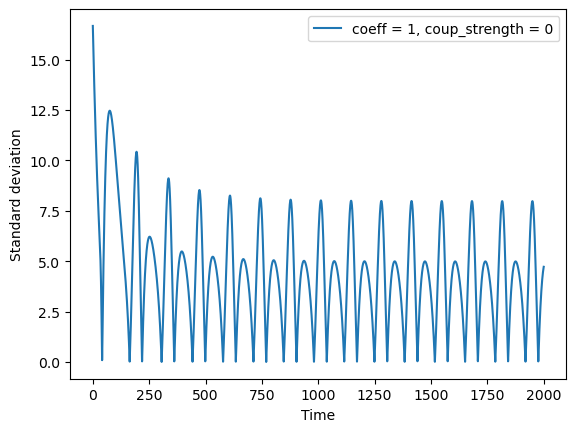

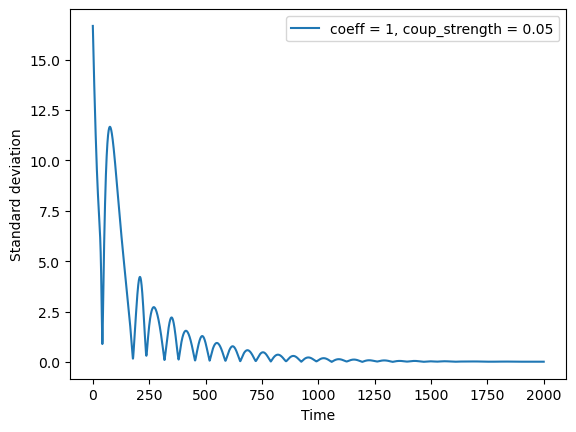

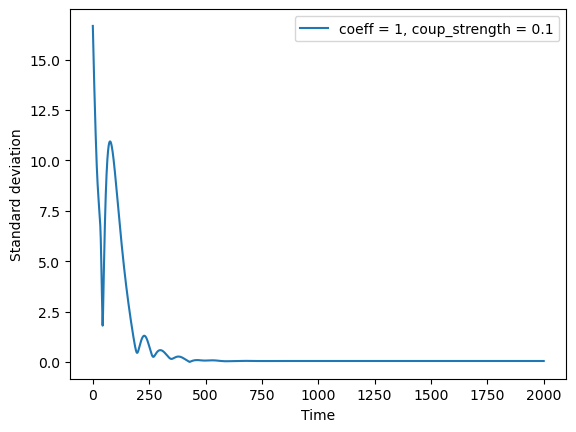

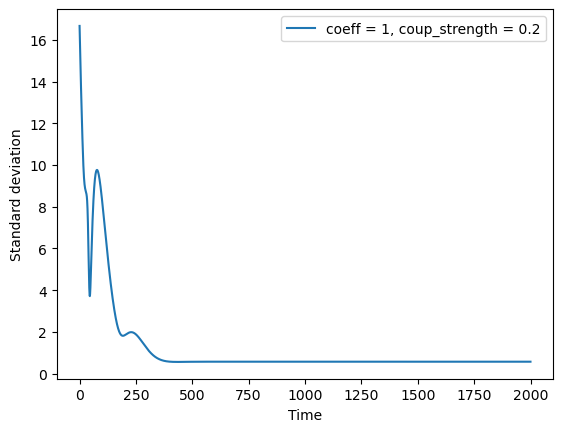

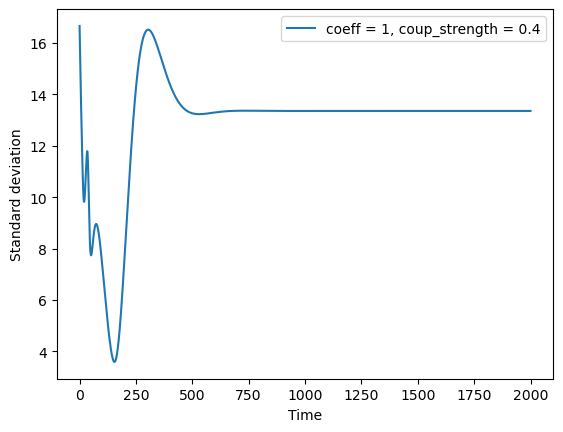

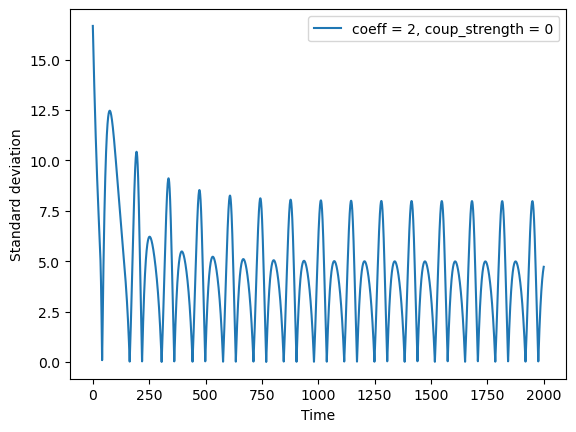

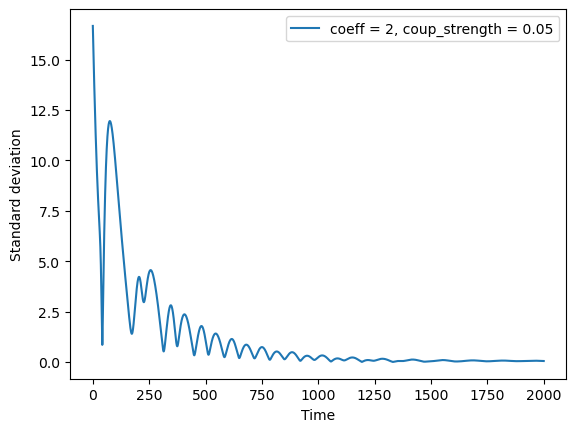

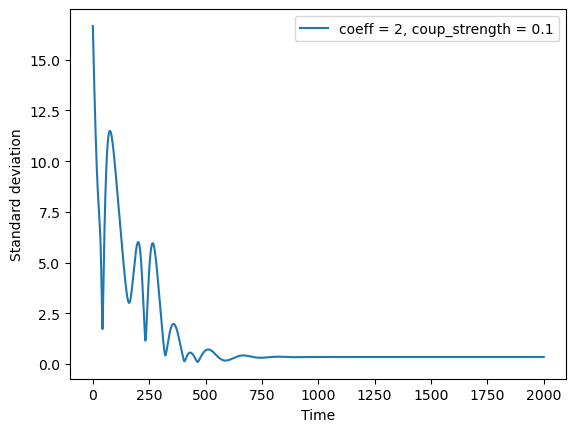

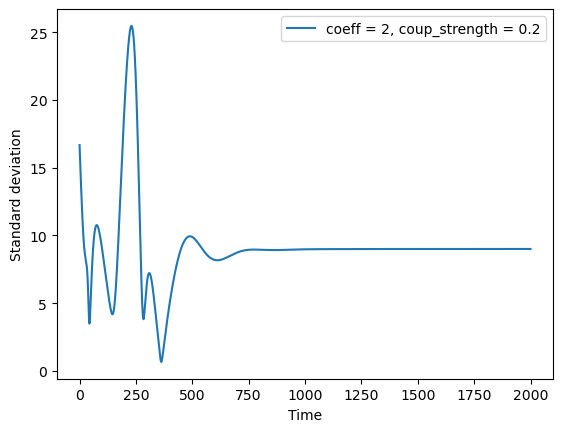

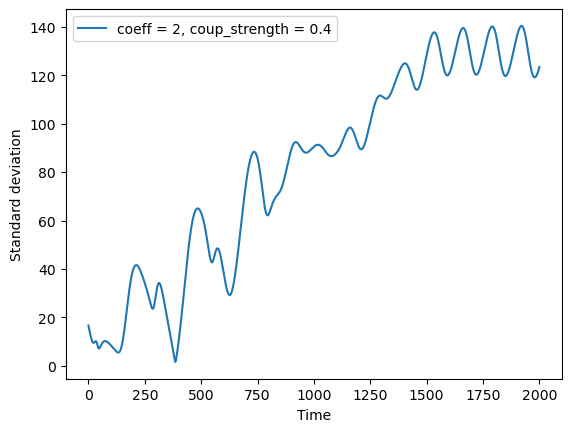

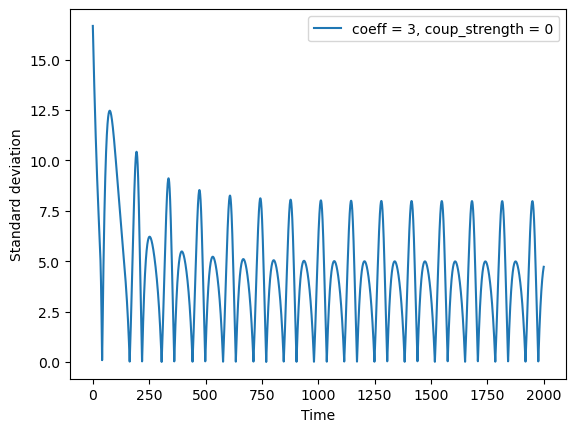

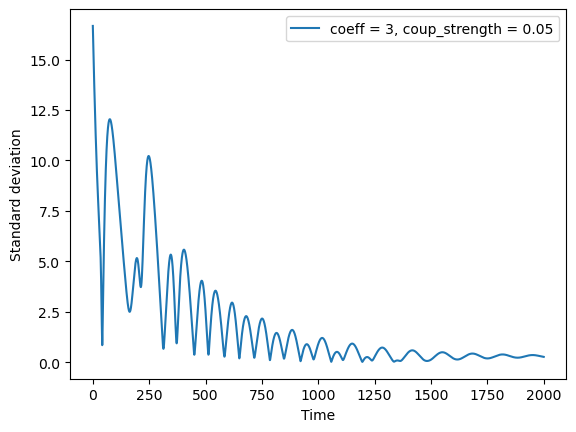

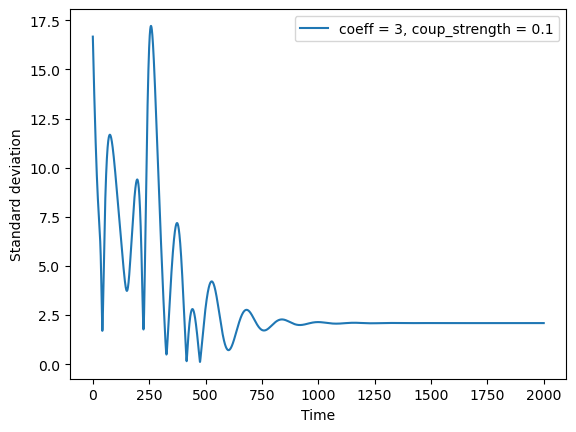

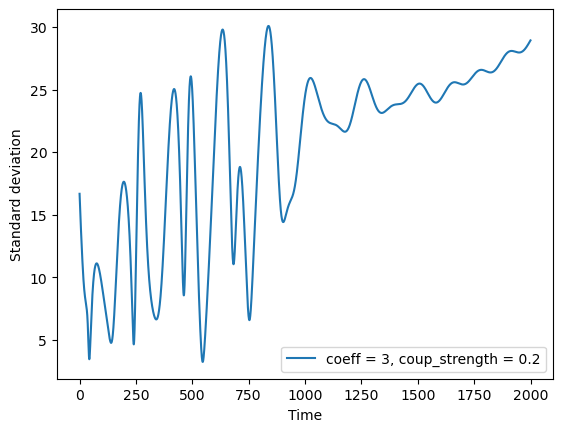

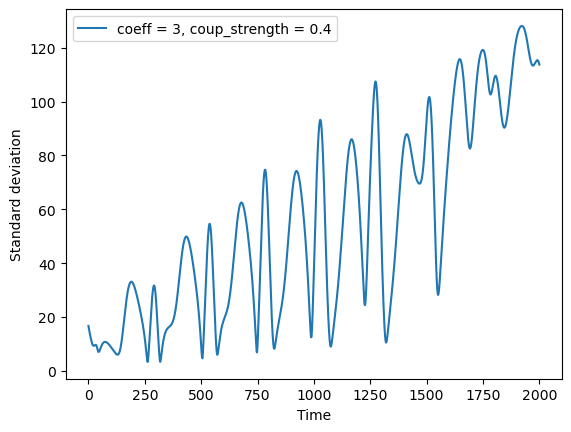

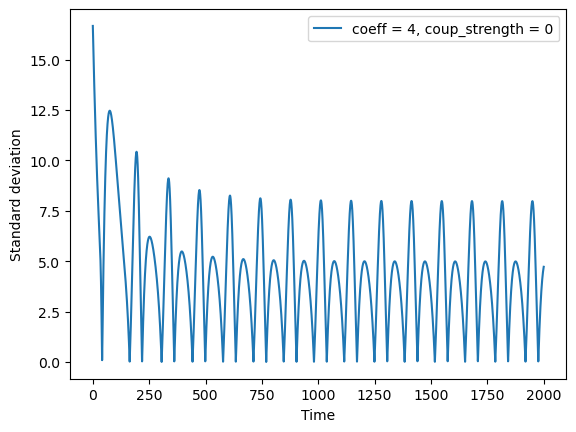

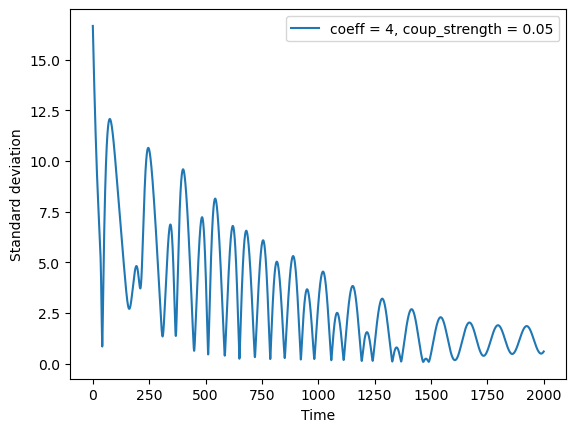

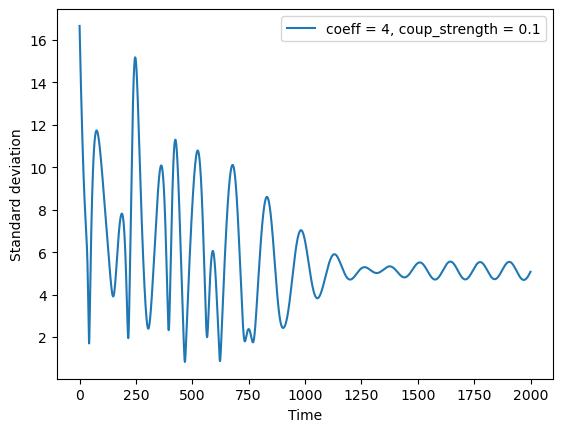

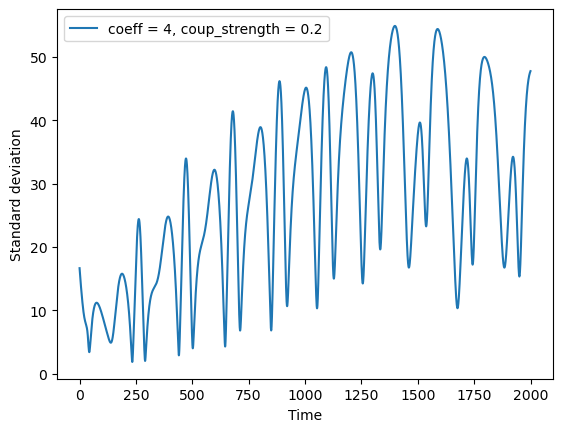

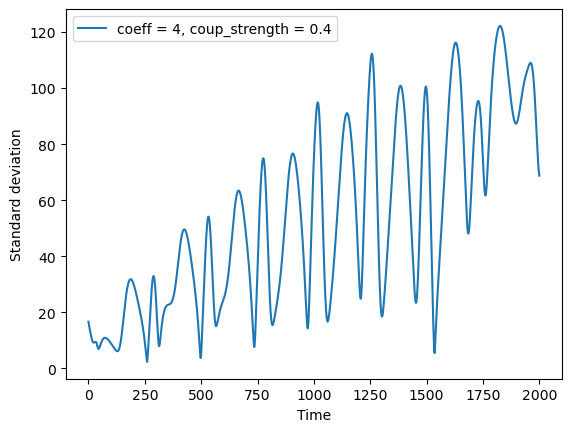

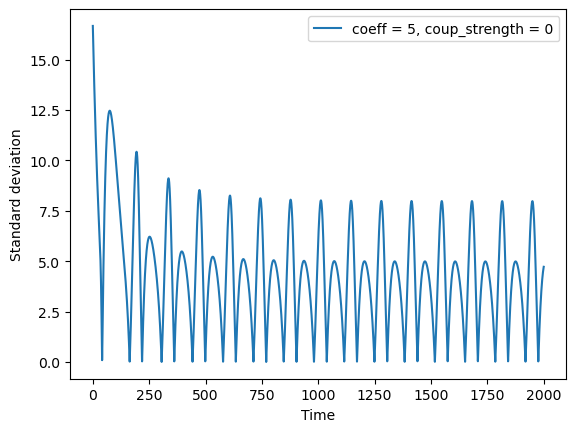

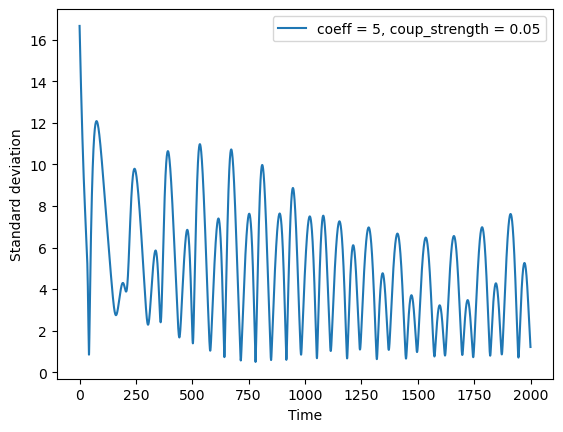

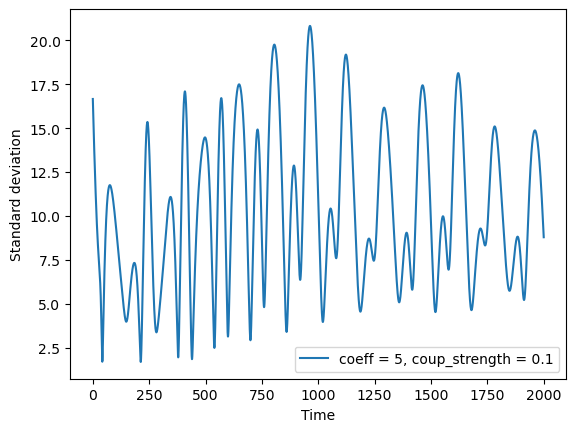

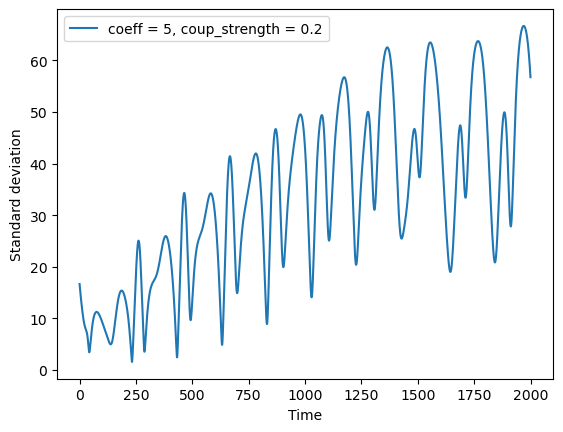

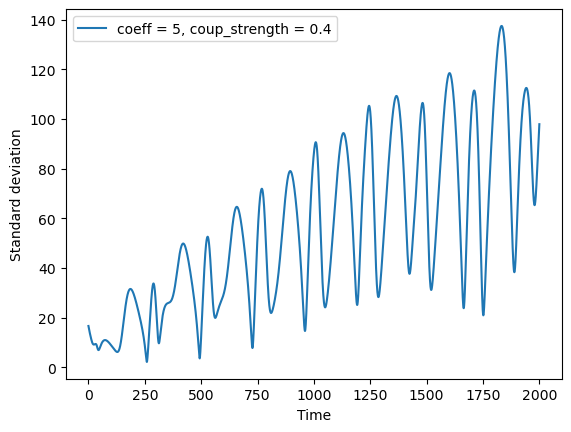

In [15]:
P_of_interest = 10

standard_deviation = np.zeros([len(coefficients), len(coupling_strengths), num_tsteps])
mean = np.zeros([len(coefficients), len(coupling_strengths), num_tsteps])

plt.figure()
for i in range(len(coefficients)):
    for j in range(len(coupling_strengths)):
        values = results[i, j, :, :, :]
        for k in range(num_tsteps):
            standard_deviation[i,j,k] = np.std(values[k, P_of_interest, :])
            mean[i,j] = np.mean(values[k, P_of_interest, :])
        plt.figure()
        plt.plot(np.arange(num_tsteps)*dt, standard_deviation[i,j], label = f'coeff = {coefficients[i]}, coup_strength = {coupling_strengths[j]}')
        plt.xlabel('Time')
        plt.ylabel('Standard deviation')
        plt.legend()


        

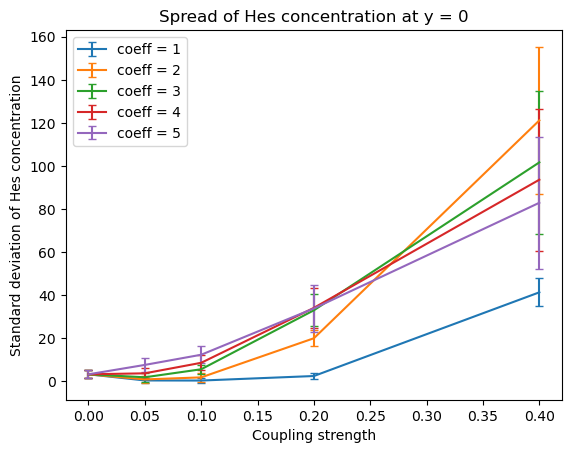

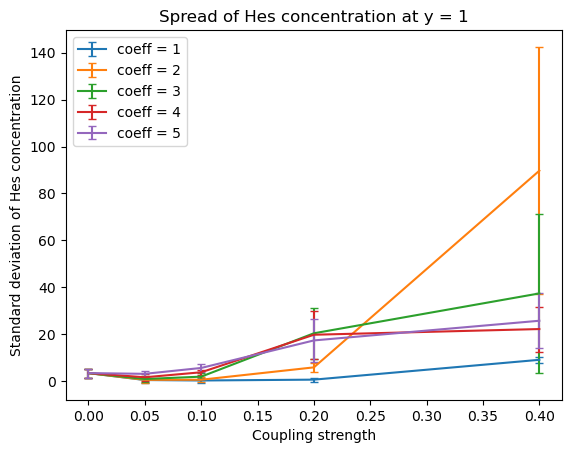

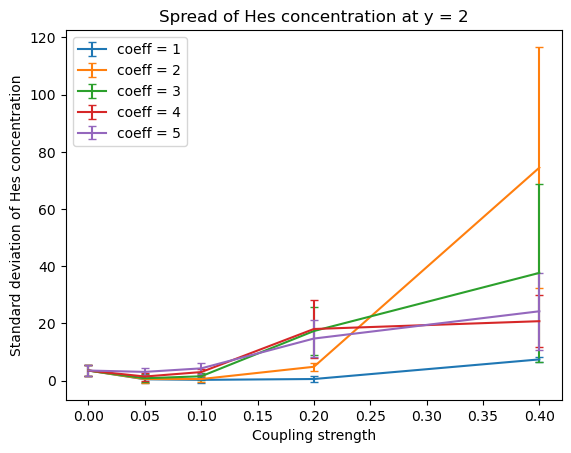

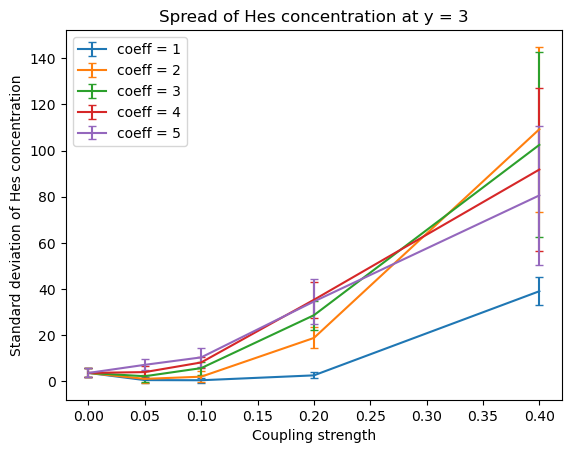

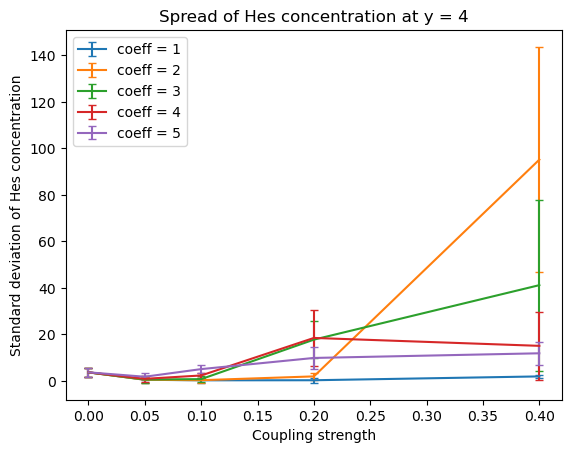

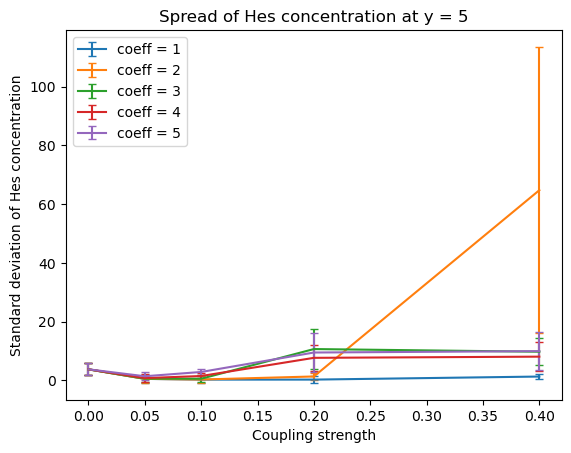

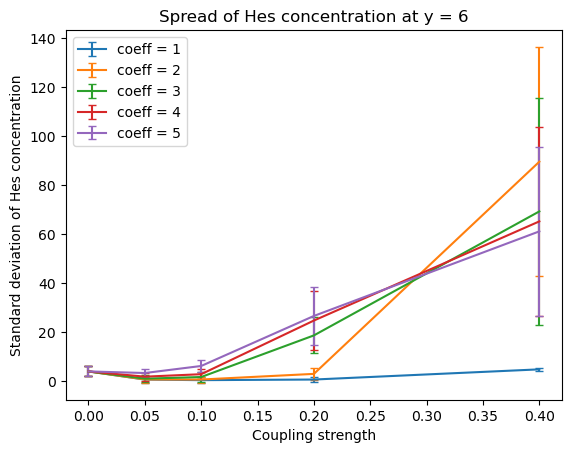

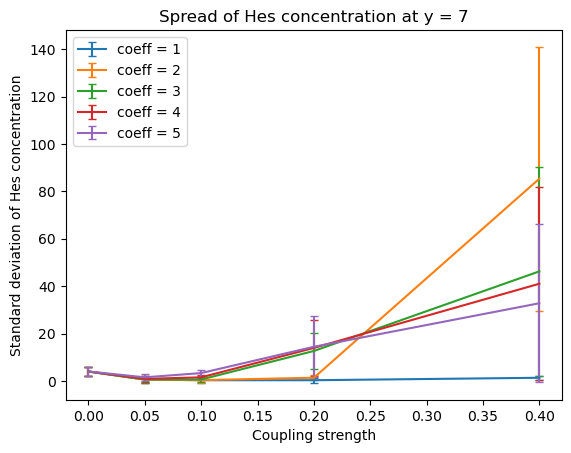

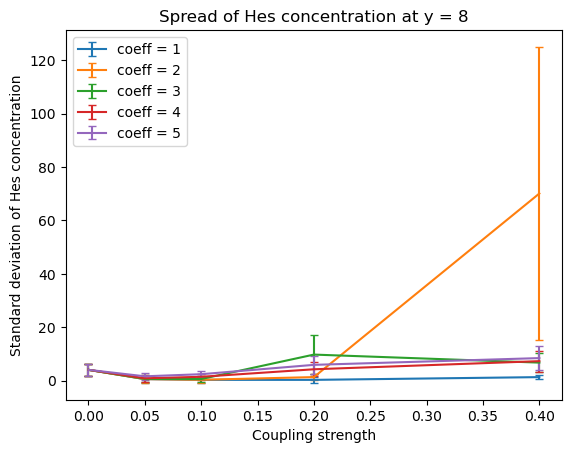

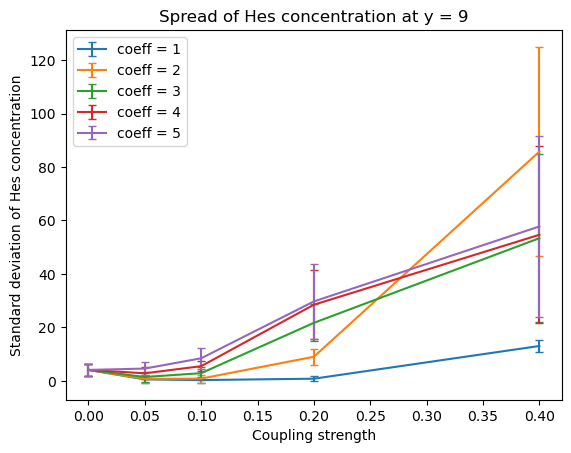

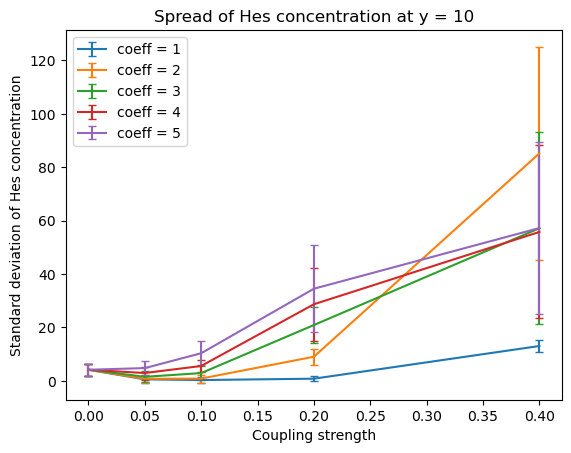

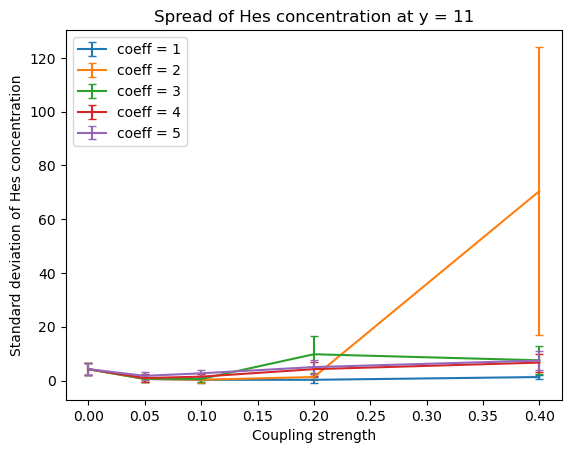

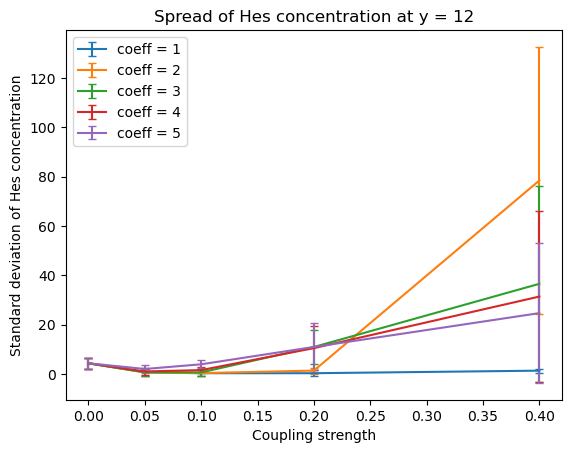

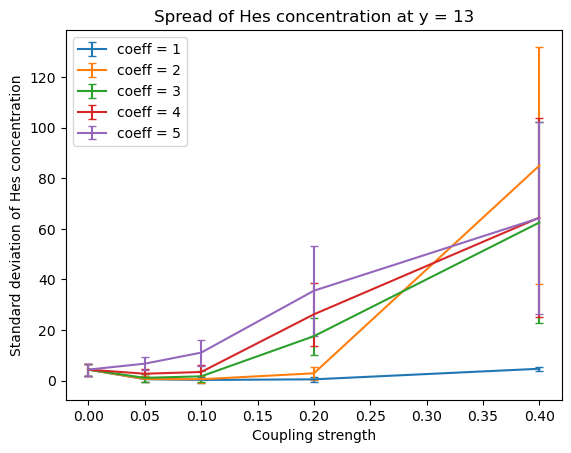

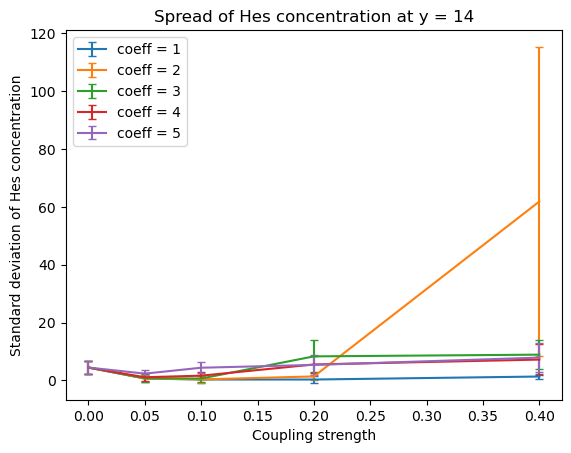

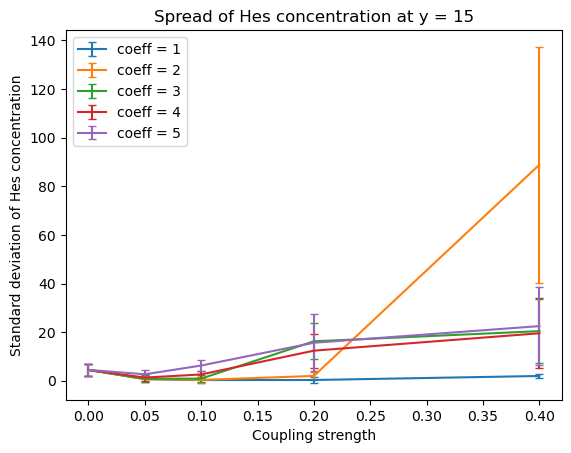

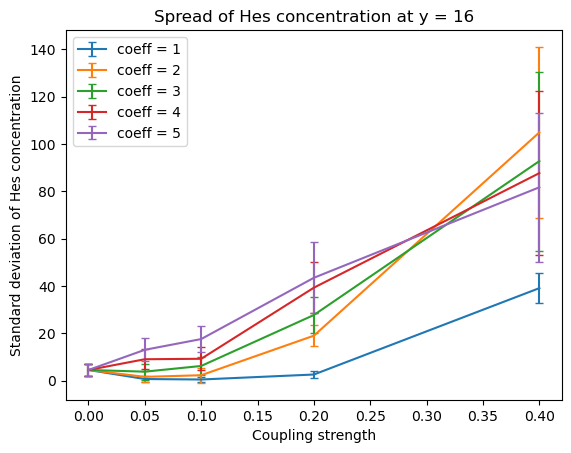

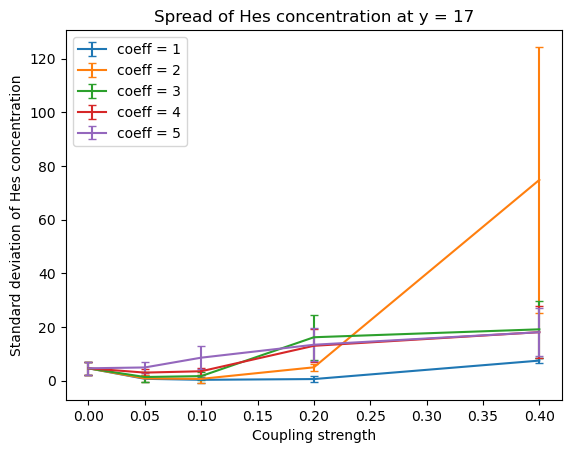

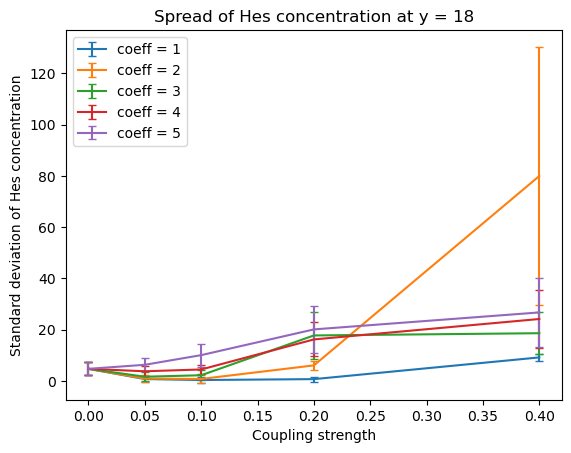

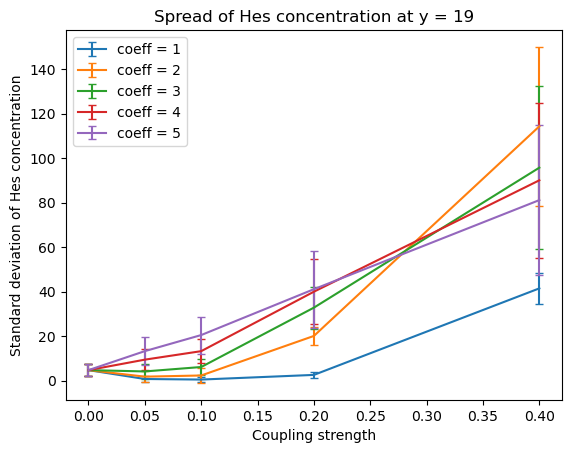

In [18]:
for p in range(lattice.P):    
    P_of_interest = p

    standard_deviation = np.zeros([len(coefficients), len(coupling_strengths), num_tsteps])
    mean = np.zeros([len(coefficients), len(coupling_strengths), num_tsteps])


    for i in range(len(coefficients)):
        for j in range(len(coupling_strengths)):
            values = results[i, j, :, :, :]
            for k in range(num_tsteps):
                standard_deviation[i,j,k] = np.std(values[k, P_of_interest, :])
                mean[i,j] = np.mean(values[k, P_of_interest, :])

    plt.figure()
    for i in range(len(coefficients)):
        plt.errorbar(coupling_strengths, np.mean(standard_deviation[i,:,500:], axis = 1), np.std(standard_deviation[i,:,500:], axis = 1), label = f'coeff = {coefficients[i]}', capsize = 3)

    plt.legend()
    plt.xlabel('Coupling strength')
    plt.ylabel('Standard deviation of Hes concentration')
    plt.title(f'Spread of Hes concentration at y = {P_of_interest}')
